In [1]:
import pandas as pd
df = pd.read_csv('survey.csv')
df.drop(columns = ['index','Timestamp','Country','state','comments'],inplace = True)
df.head()
def clean_gender(g):
    g=g.lower()
    if g in ['male', 'm', 'man']:
        return 'male'
    elif g in ['female', 'f', 'woman']:
        return 'female'
    else:
        return 'other'
df['Gender'] = df['Gender'].apply(clean_gender)
print(df['Gender'])
# Drop rows with missing values in important columns
important_cols = [
    'Age', 'Gender', 'self_employed', 'work_interfere', 'no_employees',
    'remote_work', 'tech_company', 'benefits', 'care_options',
    'wellness_program', 'seek_help', 'mental_health_consequence',
    'phys_health_consequence', 'coworkers', 'supervisor',
    'mental_health_interview', 'phys_health_interview',
    'mental_vs_physical', 'obs_consequence', 'treatment'
]

df.dropna(subset=important_cols, inplace=True)

# Check how much data remains
df.shape

df['no_employees'] = df['no_employees'].replace({
    '1-5': 3,
    '6-25': 15,
    '26-100': 63,
    '100-500': 300,
    '500-1000': 750,
    'More than 1000': 1200
})  

for col in df.columns:
    if col in ['Age']:
        continue
    print(df[col].value_counts(dropna=False))


from sklearn.preprocessing import LabelEncoder
columns = []
for col in df.columns:
    if col in ['Age']:
        continue
    else :
        columns.append(col)

le = LabelEncoder()
for col in columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
    else:
        df[col] = df[col].astype('int')

for col in df.columns:
    if col in ['Age']:
        continue
    print(df[col].value_counts(dropna=False))


0       female
1         male
2         male
3         male
4         male
         ...  
1254      male
1255      male
1256      male
1257    female
1258      male
Name: Gender, Length: 1259, dtype: object
Gender
male      735
female    200
other      42
Name: count, dtype: int64
self_employed
No     852
Yes    125
Name: count, dtype: int64
family_history
No     535
Yes    442
Name: count, dtype: int64
treatment
Yes    624
No     353
Name: count, dtype: int64
work_interfere
Sometimes    458
Never        207
Rarely       170
Often        142
Name: count, dtype: int64
no_employees
63      224
1200    220
15      213
3       140
300     137
750      43
Name: count, dtype: int64
remote_work
No     679
Yes    298
Name: count, dtype: int64
tech_company
Yes    799
No     178
Name: count, dtype: int64
benefits
Yes           399
No            291
Don't know    287
Name: count, dtype: int64
care_options
Yes         388
No          364
Not sure    225
Name: count, dtype: int64
wellness_program
N

C:\Users\rithv\AppData\Local\Temp\ipykernel_7000\2073084403.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['no_employees'] = df['no_employees'].replace({


Gender
1    735
0    200
2     42
Name: count, dtype: int64
self_employed
0    852
1    125
Name: count, dtype: int64
family_history
0    535
1    442
Name: count, dtype: int64
treatment
1    624
0    353
Name: count, dtype: int64
work_interfere
3    458
0    207
2    170
1    142
Name: count, dtype: int64
no_employees
63      224
1200    220
15      213
3       140
300     137
750      43
Name: count, dtype: int64
remote_work
0    679
1    298
Name: count, dtype: int64
tech_company
1    799
0    178
Name: count, dtype: int64
benefits
2    399
1    291
0    287
Name: count, dtype: int64
care_options
2    388
0    364
1    225
Name: count, dtype: int64
wellness_program
1    651
2    195
0    131
Name: count, dtype: int64
seek_help
1    500
0    266
2    211
Name: count, dtype: int64
anonymity
0    624
2    299
1     54
Name: count, dtype: int64
leave
0    413
2    210
4    156
1    108
3     90
Name: count, dtype: int64
mental_health_consequence
0    376
1    343
2    258
Name: count, d

In [2]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,1,1,1,0,3,3,1,1,2,...,2,4,1,1,2,2,1,2,2,1
20,29,1,0,1,1,3,300,0,1,2,...,1,1,0,1,1,1,1,1,1,0
21,31,1,1,0,0,0,3,1,1,1,...,2,1,1,1,1,1,1,0,2,0
22,46,1,0,0,1,1,63,1,1,2,...,0,0,0,1,1,2,1,0,1,0
23,41,1,0,0,1,0,1200,0,0,0,...,0,0,0,1,0,0,1,2,0,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your cleaned and encoded DataFrame
y = df['treatment']  # Target column (e.g., 'mental_health_issue')
X = df.drop('treatment', axis=1)  # All the feature columns

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter = 400)

# Train the model on the training data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report for precision, recall, F1-score
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7704081632653061
              precision    recall  f1-score   support

           0       0.72      0.56      0.63        68
           1       0.79      0.88      0.83       128

    accuracy                           0.77       196
   macro avg       0.75      0.72      0.73       196
weighted avg       0.76      0.77      0.76       196

[[ 38  30]
 [ 15 113]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib 

# Assuming df is your cleaned and encoded DataFrame
y = df['treatment']  # Target column (e.g., 'mental_health_issue')
X = df.drop('treatment', axis=1)  # All the feature columns

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

joblib.dump(model, 'mental_health_model.pkl')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report for precision, recall, F1-score
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8316326530612245
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        68
           1       0.83      0.93      0.88       128

    accuracy                           0.83       196
   macro avg       0.83      0.79      0.80       196
weighted avg       0.83      0.83      0.83       196

[[ 44  24]
 [  9 119]]


                      Feature  Importance
4              work_interfere    0.215780
0                         Age    0.107293
3              family_history    0.063285
5                no_employees    0.058551
9                care_options    0.050940
13                      leave    0.048452
8                    benefits    0.044641
17                 supervisor    0.037865
19      phys_health_interview    0.036406
14  mental_health_consequence    0.036385
16                  coworkers    0.035435
20         mental_vs_physical    0.034141
1                      Gender    0.031929
11                  seek_help    0.029455
15    phys_health_consequence    0.026432
12                  anonymity    0.025803
10           wellness_program    0.025489
6                 remote_work    0.024493
18    mental_health_interview    0.018779
21            obs_consequence    0.017999
7                tech_company    0.017735
2               self_employed    0.012713


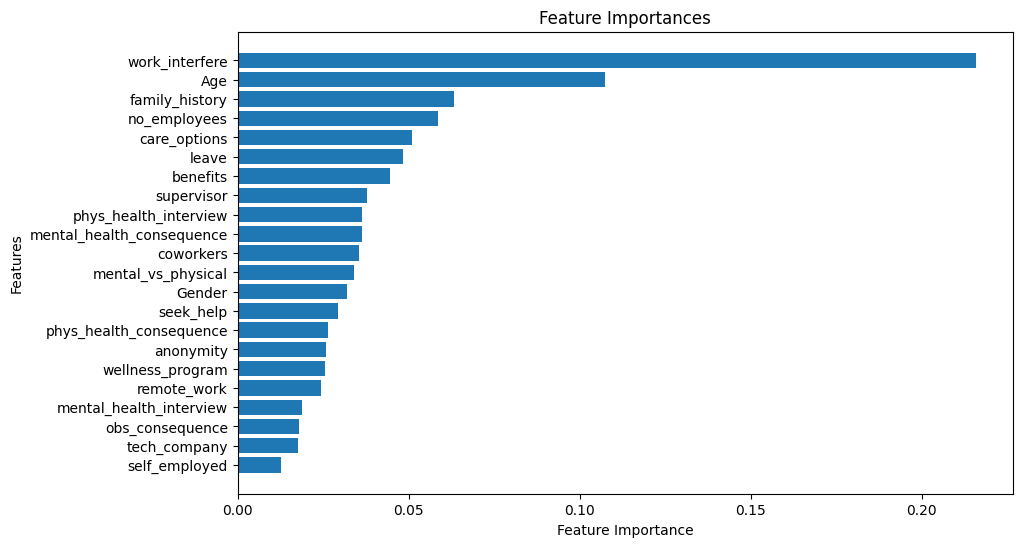

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your model is named 'model' and it's already trained
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for better display
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

print(feature_df)

# Optional: Bar plot
plt.figure(figsize=(10,6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()
